In [21]:
#Make sure to run this cell as the start
from quantum import *
#quantum.py is completely self contained; optionally, if matplotlib is installed then that is used for rendering graphs
#else, everything is rendered in terminal

In [22]:
# create a qubit using the qbit(x) function, where x is the default value of the bit:
q0 = qbit(1)
q1 = qbit(0)
#qubit 1 is represented by [0 1] while qubit 0 is [1 0]


#all qbits are just a list of 2 elements, elements being either real or complex
#complex numbers in this library are handled with `comp` class, and Matrices with `Matrix` class
print("q0:", q0, ", q1:", q1)

q0: [0, 1] , q1: [1, 0]


In [23]:
#gates are applied on qubits using the corresponding gate funtions.
#as of now, IDEN (identity), NOT (not), HAD (hadamard), CNOT (controlled not) gates have been implemented. 
#however, after application of CNOT gate I still haven't figured out how to use other gates

#to see the outcome of a computation, use the MEASURE function
#Measurement can be done on a single qubit or a set of qubits. If multiple qubits are to be measured,
#then we must pass the inner tensor product of these qubits to MEASURE. tensor product can be 
#calculated using the tensor function.

In [24]:
#example: measures a single qubit (here the qubit is 1, so measurement is always 1, try running this line a few times)
print(MEASURE(q0))
# print(MEASURE(q1))

#example: measuring a set of qubits:
q0andq1 = tensor(q0, q1)
print(MEASURE(q0andq1))

[0, 1]
[0, 0, 1, 0]


In [25]:
#example: displaying measurements in a readable way
#use the extract function to get the value of a single qubit from a measurement of set of qubits
measurement = MEASURE(q0andq1)
q0m = extract(measurement, 0) #here 0 is the qbitindex as it is the 0th element in the tensor product
q1m = extract(measurement, 1)
print("q0m: ", q0m, ", q1m: ", q1m)

q0m:  [0, 1] , q1m:  [1, 0]


In [26]:
#so far nothing of note, we created qubits 0 and 1, and measured them together and individually, and found
#the same qubits.

#this is where things get interesting

In [27]:
#list of gates so far:
#IDEN -> identity, return the same exact value with no change
#NOT -> returns the logical not value of the input value
#HAD -> Hadamard gate, can put a qubit into superposition of take a qubit already in superposition to normalcy
#CNOT -> takes 2 qubits as input; one qubit is designated control, the other target.
#        if the control qubit is 0, nothing is done. if the control qubit is 1, the target qubit gets the
#        NOT gate applied on it.

#example: hadamard gate in action
print(HAD(q0))

[0.71 + i0.00, -0.71 + i0.00]


In [28]:
#example: measuring 2 qubits in independent superpositions:
q0s = HAD(q0)
q1s = HAD(q1)

measurement = MEASURE(tensor(q0s, q1s))

q0m = extract(measurement, 0)
q1m = extract(measurement, 1)

print("q0 value: ", q0m, ", q1 value: ", q1m)
#try running this cell a few times to see the various outcomes

q0 value:  [0, 1] , q1 value:  [1, 0]


In [29]:
# in the previous example, the qubits were put in superposittion, meaning each had a 50-50 chance of being
# either 0 or 1. since both the bits were in superposition, the chance of seeing 00, 01, 10, 11 is 
# equally likely, even though we started with qubits that were only 0 or 1

#to automate the process we did in previous example, the run function can be used.

#example: running a measurement multiple times and viewing the outcome:
run(shots = 16000, state = tensor(q0s, q1s))

#try running the experiment a few times to see the outcomes.
#each of the possible states, represented by |Ψ  > is a possible state of the set of qubits.
# the percentages show what percent of the total number of measurements made (here 1600) were that particular state
#so in this case, where both the bits are euqally likely to be 0 or 1, 00, 01, 10, 11 are all equally likely
#hence, each has a 25% share of the total measurements

|Ψ00> : 25.08125%, |Ψ01> : 25.5375%, |Ψ10> : 24.925%, |Ψ11> : 24.456249999999997%


In [30]:
#example: multiple superposition (no limit to how many can be in superpostion):
state = tensor(HAD(qbit(0)), tensor(HAD(qbit(0)), HAD(qbit(0))))
run(1600, state)

|Ψ000> : 11.1875%, |Ψ001> : 13.5625%, |Ψ010> : 12.625%, |Ψ011> : 13.625000000000002%, |Ψ100> : 12.812499999999998%, |Ψ101> : 11.75%, |Ψ110> : 13.1875%, |Ψ111> : 11.25%


In [31]:
#example: using CNOT:
measurement = MEASURE(CNOT(q0, q1))

q0m = extract(measurement, 0)
q1m = extract(measurement, 1)

print("q0 value: ", q0m, ", q1 value: ", q1m)

#the result is as expected (note, we are using the normal versions of the qubits in this example)

q0 value:  [0, 1] , q1 value:  [0, 1]


In [32]:
#example: quantum entanglement:

q0h = HAD(q0) #one of the bits is in superposition

#the bits are now put into entanglement:
state = CNOT(q0h, q1)


run(1600, state)
#both the bits are always the same value, that is knowing the value of one tells you the other's

|Ψ00> : 52.4375%, |Ψ01> : 0.0%, |Ψ10> : 0.0%, |Ψ11> : 47.5625%


In [33]:
#example: quantum entanglement 2:

q0h = HAD(q0) #one of the bits is in superposition

#the bits are now put into entanglement:
state = CNOT(q0h, qbit(1))


run(1600, state)
#both the bits are always the oppposite value, that is knowing the value of one tells you the other's

|Ψ00> : 0.0%, |Ψ01> : 50.0625%, |Ψ10> : 49.9375%, |Ψ11> : 0.0%


In [34]:
#dealing with invidual qubits can get tedious, instead a quantum program or qprogram can be used
#to simplify all this stuff and run experiments quickly

In [35]:
#example: using a qprogram:

#make a qprogram with some qubits
myqprogram = qprogram(nqbits = 2)
#qubits are always labeled q0 -> q(nqbits-1) from top to bottom
#each qubit has a gate-line, which act somewhat like a quantum circuit

#adding gates to the qprogram's lines:
myqprogram.addgates(qbitindex = 0, gates = [HGATE(), HGATE()])
myqprogram.addgates(qbitindex = 1, gates = [IGATE(), CNOTGATE()])
#two things of note:
#gates supported in qprograms as of now are:
#hadamard, identity, cnot, not (with the above gate names)
#secondly, cnot gate is assumed to have the target bit at the place it is being called, while the control
#qubit is direclty the one above it, with the control handle directly above it

#compile the program to see its circuit diagram:
myqprogram.compile()
#note that identity gates are automatically added to make it easier to understand the working of two input
#gates like cnot



Compiling program...

q0 (0) ⮕  ---[ H ]---[ I ]---[ H ]---
q1 (0) ⮕  ---[ I ]---[ ⦿ ]---[ I ]---

Compilation complete!




q0 (0) ⮕  ---[ H ]---[ I ]---[ H ]---
q1 (0) ⮕  ---[ I ]---[ ⦿ ]---[ I ]---

In [36]:
#run the program to see the output:

myqprogram.run()

|Ψ00> : 24.875%, |Ψ01> : 23.8125%, |Ψ10> : 26.375%, |Ψ11> : 24.9375%


Using cache...
|Ψ00> : 25.0%, |Ψ01> : 26.3125%, |Ψ10> : 22.75%, |Ψ11> : 25.937500000000004%


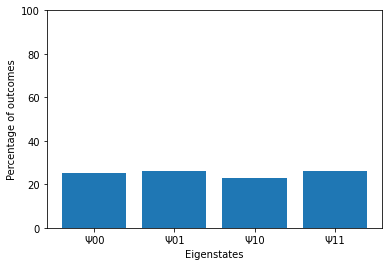

In [37]:
#note: the run function on a program and standalone run functions are the same, and hence take the same
#parameters. run can also graph the results
myqprogram.run(binary = True, graph = True)
#if you are using an ide, the autocomplete should prompt you with all the optional parameters of run that
#are available

In [38]:
#the terminal parameter is used to either display graphs in matplotlib or in terminal
#in case matplotlib is not installed, terminal is where all graphs and rendered by default and
#the parameter has no effect

myqprogram.run(binary = True, graph = True, terminal=True)


Using cache...
|Ψ00> : 27.0625%, |Ψ01> : 23.1875%, |Ψ10> : 26.187500000000004%, |Ψ11> : 23.5625%

Ψ00 █████████████ 27.0625%
Ψ01 ███████████ 23.1875%
Ψ10 █████████████ 26.187500000000004%
Ψ11 ███████████ 23.5625%



In [39]:
#Example of n qubits in entanglement:

numofqubits = 4

nentangled = qprogram(numofqubits)

nentangled.addgates(0, [HGATE()])

for each in range(1, numofqubits):
    for i in range(each):
        nentangled.addgates(each, [IGATE()])
    nentangled.addgates(each, [CNOTGATE()])

nentangled.compile()



Compiling program...

q0 (0) ⮕  ---[ H ]---[ I ]---[ I ]---[ I ]---
q1 (0) ⮕  ---[ I ]---[ ⦿ ]---[ I ]---[ I ]---
q2 (0) ⮕  ---[ I ]---[ I ]---[ ⦿ ]---[ I ]---
q3 (0) ⮕  ---[ I ]---[ I ]---[ I ]---[ ⦿ ]---

Compilation complete!




q0 (0) ⮕  ---[ H ]---[ I ]---[ I ]---[ I ]---
q1 (0) ⮕  ---[ I ]---[ ⦿ ]---[ I ]---[ I ]---
q2 (0) ⮕  ---[ I ]---[ I ]---[ ⦿ ]---[ I ]---
q3 (0) ⮕  ---[ I ]---[ I ]---[ I ]---[ ⦿ ]---

In [40]:
nentangled.run(graph=True, terminal=True)

|Ψ0000> : 51.0625%, |Ψ0001> : 0.0%, |Ψ0010> : 0.0%, |Ψ0011> : 0.0%, |Ψ0100> : 0.0%, |Ψ0101> : 0.0%, |Ψ0110> : 0.0%, |Ψ0111> : 0.0%, |Ψ1000> : 0.0%, |Ψ1001> : 0.0%, |Ψ1010> : 0.0%, |Ψ1011> : 0.0%, |Ψ1100> : 0.0%, |Ψ1101> : 0.0%, |Ψ1110> : 0.0%, |Ψ1111> : 48.9375%

Ψ0000 █████████████████████████ 51.0625%
Ψ0001 
Ψ0010 
Ψ0011 
Ψ0100 
Ψ0101 
Ψ0110 
Ψ0111 
Ψ1000 
Ψ1001 
Ψ1010 
Ψ1011 
Ψ1100 
Ψ1101 
Ψ1110 
Ψ1111 ████████████████████████ 48.9375%

